## Membuat clasification class wine

### Atrribut Information
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

### Import library

In [1]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

### show semua keys dan value dalam wine dataset (bentuk dictionary)

In [7]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [11]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [8]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [10]:
wine.data[5] # data kelima

array([1.42e+01, 1.76e+00, 2.45e+00, 1.52e+01, 1.12e+02, 3.27e+00,
       3.39e+00, 3.40e-01, 1.97e+00, 6.75e+00, 1.05e+00, 2.85e+00,
       1.45e+03])

In [20]:
wine.data.shape

(178, 13)

In [14]:
wine.feature_names # feature atau column

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [16]:
wine.target_names # target/column label

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [17]:
wine.target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
wine.target.shape

(178,)

### Model Building

#### 1. RandomForestClassifier

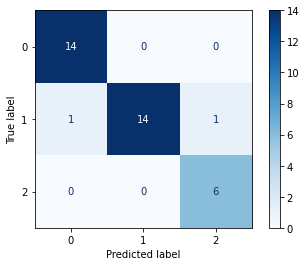

In [44]:
# import library train_test_split dan plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

X, y = wine.data, wine.target

# split training dan testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# inisiasasi model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# predict X_test
y_pred = rfc.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_plot = plot_confusion_matrix(rfc, X_test, y_test, cmap='Blues')

# accuracy score
acc = accuracy_score(y_test, y_pred)

In [50]:
print(cm)
print('{:.0%}'.format(acc))

[[14  0  0]
 [ 1 14  1]
 [ 0  0  6]]
94%


C:\Users\ACER\anaconda3\lib\site-packages\dabl\plot\supervised.py:546: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."


Target looks like classification
Linear Discriminant Analysis training set score: 1.000


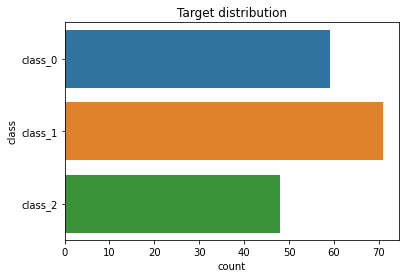

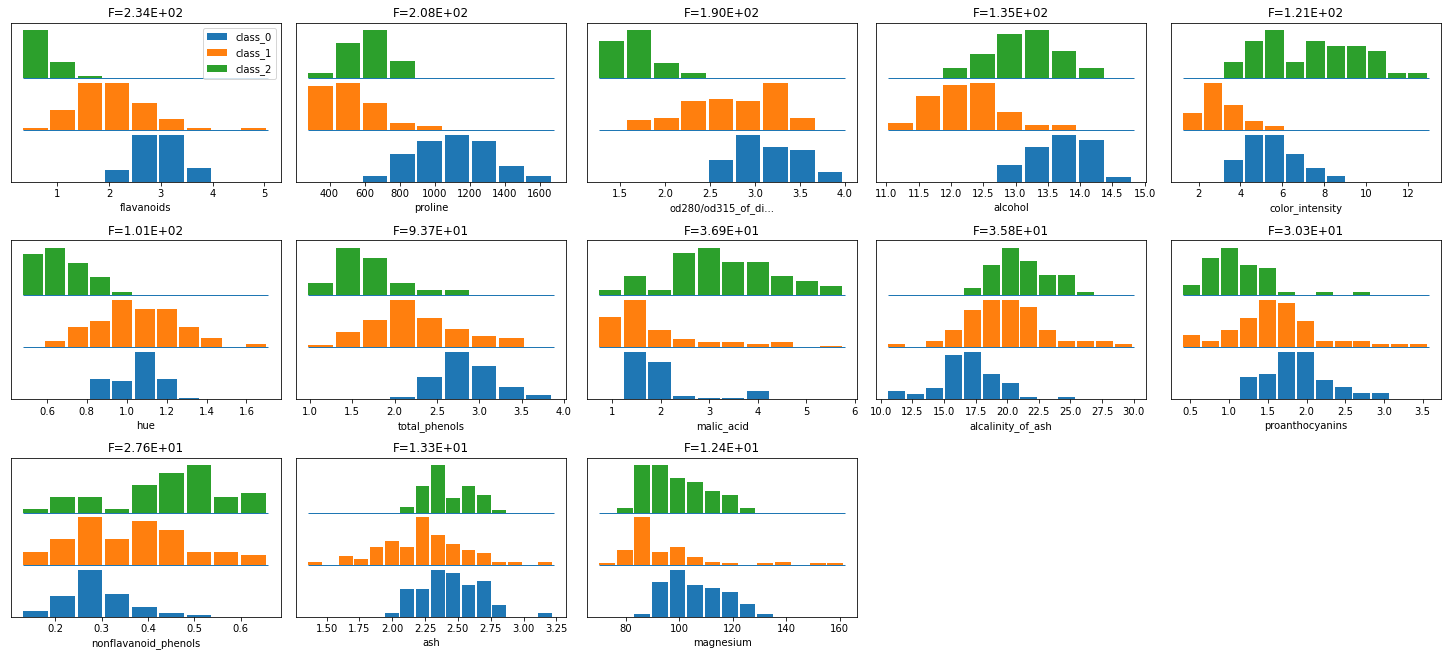

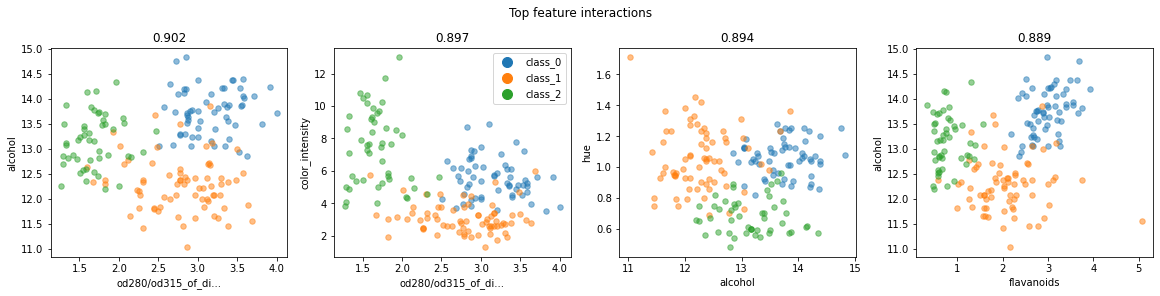

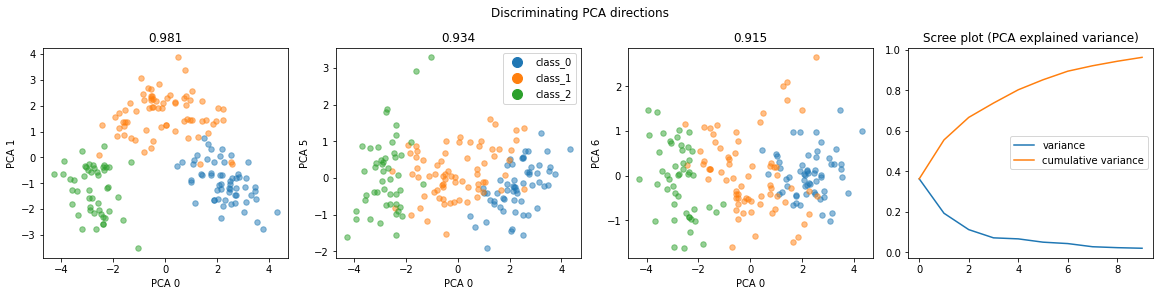

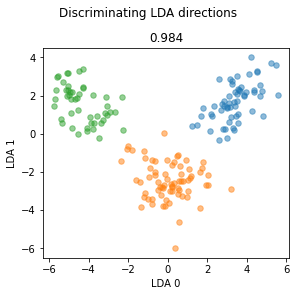

In [42]:
# ! pip install dabl
# sphinx_gallery_thumbnail_number = 4
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from dabl import plot
from dabl.utils import data_df_from_bunch

wine_bunch = load_wine()
wine_df = data_df_from_bunch(wine_bunch)

plot(wine_df, 'target')
plt.show()

### Coba prediksi dengan memasukkan data baru 

In [62]:
data = np.linspace(1, 5, 1000)
data_baru = [data[28], data[10], data[54], data[3], data[22], data[45],
            data[19], data[27], data[100], data[1], data[76], data[88],
            data[61]]
rfc.predict([data_baru])

array([1])

#### 2. KNeighborsClassifier

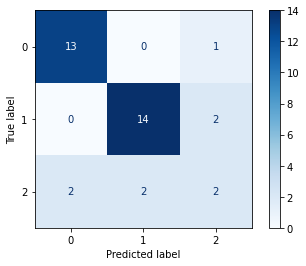

In [64]:
# import library train_test_split dan plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

X, y = wine.data, wine.target

# split training dan testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# inisiasasi model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# predict X_test
y_pred = knn.predict(X_test)

# confusion matrix
cm_knn = confusion_matrix(y_test, y_pred)
cm_plot = plot_confusion_matrix(knn, X_test, y_test, cmap='Blues')

# accuracy score
acc_knn = accuracy_score(y_test, y_pred)

In [65]:
print('{:.0%}'.format(acc_knn))

81%


#### 3. LogisticRegression

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


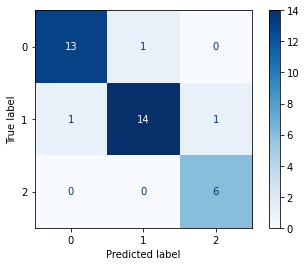

In [66]:
# import library train_test_split dan plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

X, y = wine.data, wine.target

# split training dan testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# inisiasasi model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# predict X_test
y_pred = lr.predict(X_test)

# confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)
cm_plot = plot_confusion_matrix(lr, X_test, y_test, cmap='Blues')

# accuracy score
acc_lr = accuracy_score(y_test, y_pred)

In [68]:
print('{:.0%}'.format(acc_lr))

92%


### Compare model

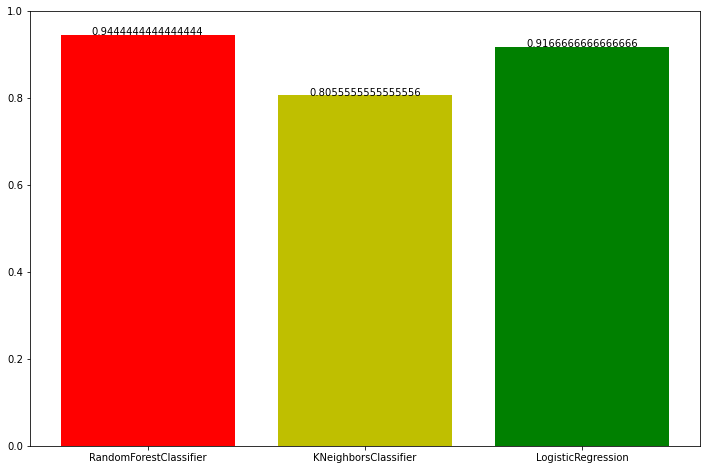

In [81]:
FIGSIZE = (12,8)
model = ['RandomForestClassifier', 'KNeighborsClassifier', 'LogisticRegression']
accuracy = [acc, acc_knn, acc_lr] 
color = ['r', 'y', 'g']

plt.figure(figsize=FIGSIZE)
plt.bar(model, accuracy, color=color)
for i in range(len(model)):
    plt.text(i,accuracy[i],accuracy[i],ha='center')
plt.ylim(0,1)
plt.show()